In [1]:
import os

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
os.getcwd()

'C:\\Users\\Admin'

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [19]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [89]:
x_train[0][31]

array([[177, 144, 116],
       [168, 129,  94],
       [179, 142,  87],
       [188, 149,  67],
       [202, 168,  68],
       [218, 189,  76],
       [218, 191,  72],
       [207, 181,  70],
       [191, 163,  79],
       [175, 143,  82],
       [166, 132,  86],
       [163, 128,  92],
       [163, 127,  94],
       [161, 123,  92],
       [153, 114,  84],
       [159, 120,  90],
       [162, 124,  93],
       [149, 116,  91],
       [140, 104,  83],
       [148, 103,  77],
       [161, 105,  69],
       [144,  95,  55],
       [112,  90,  59],
       [119,  91,  58],
       [130,  96,  65],
       [120,  87,  59],
       [ 92,  67,  46],
       [103,  78,  57],
       [170, 140, 104],
       [216, 184, 140],
       [151, 118,  84],
       [123,  92,  72]], dtype=uint8)

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [77]:
len(x_train)

50000

In [22]:
len(y_train)

50000

In [24]:
classes=np.unique(y_train)

In [25]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Normalization

In [30]:
import matplotlib.pyplot as plt

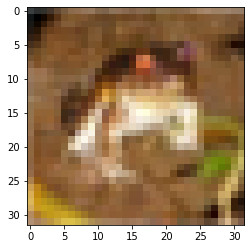

In [31]:
plt.imshow(x_train[0])

In [32]:
y_train[0]

array([6], dtype=uint8)

In [69]:
y_train[50][0]

9

In [60]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 0, 'horse')

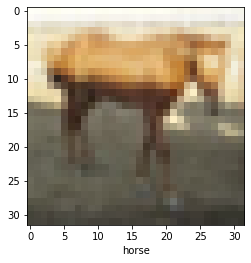

In [42]:
plt.imshow(x_train[2000])
plt.xlabel(class_names[y_train[2000][0]])

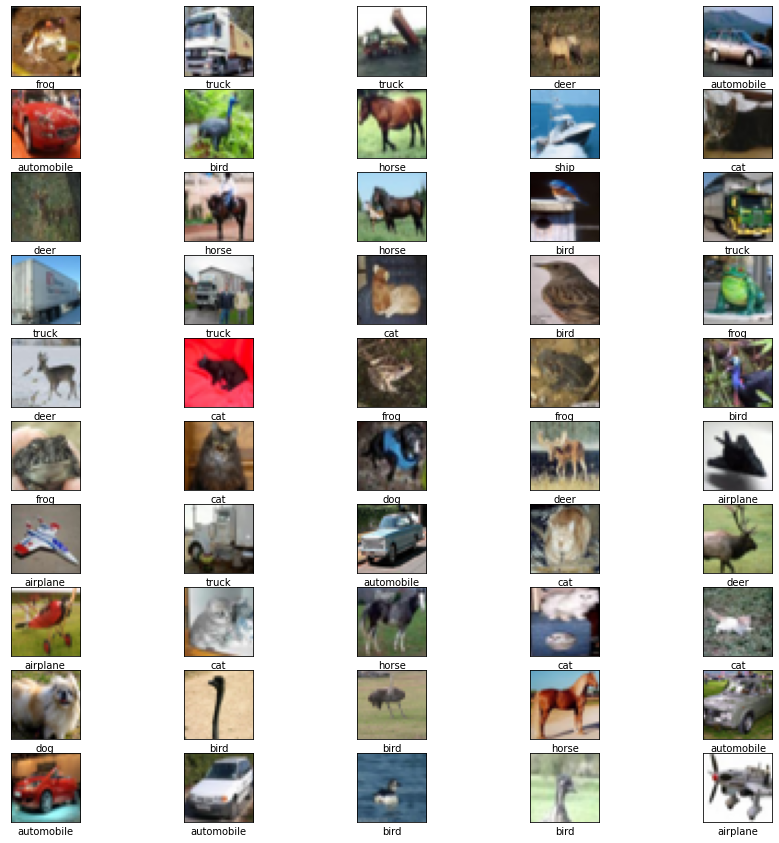

In [74]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [96]:
model=models.Sequential()

In [97]:
model

In [98]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

In [99]:
model.add(layers.MaxPooling2D((2,2)))

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [103]:
model.add(layers.MaxPooling2D((2,2)))

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


## Now we have 3D tensor and we need to feed itb to one dense layer or more so we need to convert the 3D tensor to 1D tensor

In [105]:
model.add(layers.Flatten())

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trai

In [109]:
model.add(layers.Dense(64,activation='relu'))

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [111]:
model.add(layers.Dense(10))

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)               

## Training the model

In [113]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
training = model.fit(x_train,y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4668 - accuracy: 0.4776 - val_loss: 1.3342 - val_accuracy: 0.5277
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2299 - accuracy: 0.5681 - val_loss: 1.2160 - val_accuracy: 0.5796
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1033 - accuracy: 0.6145 - val_loss: 1.1752 - val_accuracy: 0.5940
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0053 - accuracy: 0.6505 - val_loss: 1.1735 - val_accuracy: 0.5972
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9251 - accuracy: 0.6808 - val_loss: 1.1064 - val_accuracy: 0.6293
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8561 - accuracy: 0.7035 - val_loss: 1.1177 - val_accuracy: 0.6284
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7948 - accuracy: 0.7248 - val_loss: 1.1636 -

In [118]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 1.3082 - accuracy: 0.6280


## I will try to normalize inputs  

##  increase the number of CNN layers